<h1>Vereda</h1>
<img src="https://github.com/monicasofiarestrepo/InvestigacionDeOperaciones/blob/main/Proyectos/Imagenes/Vereda.png?raw=1" width="900">

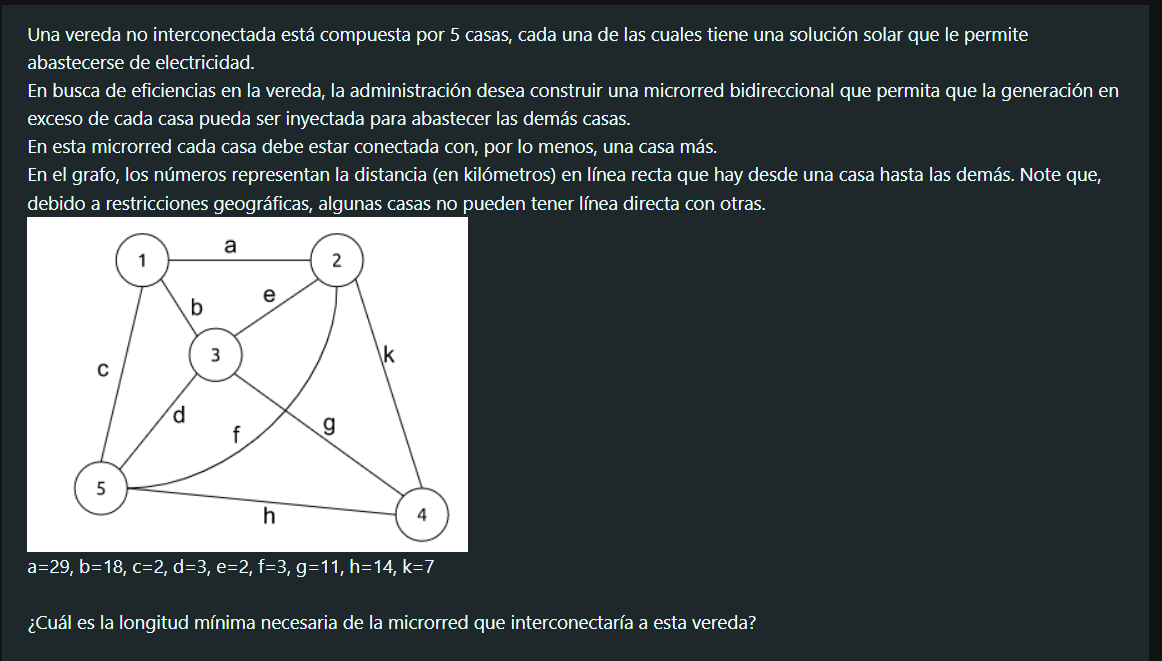

| De/Hacia| 1 | 2  | 3 | 4 | 5 |
| :-:     |:-:|:-: |:-:|:-:|:-:|
| 1 |       - | a  | b | - | c |
| 2 |       a | -  | e | k | f |
| 3 |       b | e  | - | g | d |
| 4 |       - | k  | g | - | h |
| 5 |       c | f  | d | h | - |

In [ ]:
import cvxpy as cvx
import numpy as np
import pandas as pd
# Variables de decisión
x = cvx.Variable((5,5), boolean = True)
a=29
b=18
c=2
d=3
e=2
f=3
g=11
h=14
k=7
# Función objetivo:
c = [
    [99999,a,b,99999,c],
    [a,99999,e,k,f],
    [b,e,99999,g,d],
    [99999,k,g,99999,h],
    [c,f,d,h,99999]
  ]

Z = cvx.Minimize(cvx.sum(cvx.multiply(c,x)))/2

# Restricciones
r = [
    # todos los nodos actuan como demanda porque no deben estar aislados
    cvx.sum(x[:,0]) >= 1,
    cvx.sum(x[:,1]) >= 1,
    cvx.sum(x[:,2]) >= 1,
    cvx.sum(x[:,3]) >= 1,
    cvx.sum(x[:,4]) >= 1,

    # garantizar simetría de la matriz
    cvx.upper_tri(x) == cvx.upper_tri(x.T),

    # garantizar que no hay redes aisaldas
    cvx.sum(x) >= (5-1)*2
]

P = cvx.Problem(Z,r)
P.solve()
xd=pd.DataFrame(np.round(x.value,0))
a=[str(i) for i in range(1,len(c)+1)]
xd.index = a
xd.columns = a
print(P.status)
print(P.value)
print(xd)

optimal
14.0
     1    2    3    4    5
1  0.0  0.0  0.0  0.0  1.0
2  0.0  0.0  1.0  1.0 -0.0
3  0.0  1.0  0.0  0.0  1.0
4  0.0  1.0  0.0  0.0  0.0
5  1.0  0.0  1.0  0.0  0.0


<h1>Lotes</h1>
<img src="https://github.com/monicasofiarestrepo/InvestigacionDeOperaciones/blob/main/Proyectos/Imagenes/Lotes.png?raw=1" width="900">

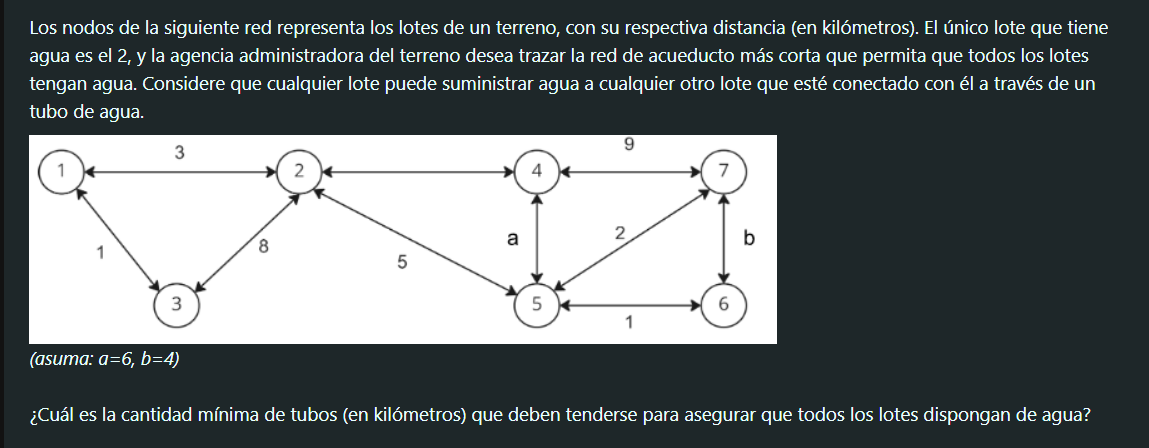

| De/Hacia| 1 | 2  | 3 | 4 | 5 | 6 | 7 |
| :-:     |:-:|:-: |:-:|:-:|:-:|:-:|:-:|
| 1 |       + | 3  | 1 | + | + | + | + |
| 2 |       3 | +  | 8 | 0 | 5 | + | + |
| 3 |       1 | 8  | + | + | + | + | + |
| 4 |       + | 0  | + | + | a | + | 9 |
| 5 |       + | 5  | + | a | + | 1 | 2 |
| 6 |       + | +  | + | + | 1 | + | b |
| 7 |       + | +  | + | 9 | 2 | b | + |

In [ ]:
import cvxpy as cvx
import numpy as np
import pandas as pd
# Variables de decisión
x = cvx.Variable((7,7), boolean = True)
a=6
b=4
# Función objetivo:
c = [
    [99999,3,1,99999,99999,99999,99999],
    [3,99999,8,0,5,99999,99999],
    [1,8,99999,99999,99999,99999,99999],
    [99999,0,99999,99999,a,99999,9],
    [99999,99999,99999,a,99999,1,2],
    [99999,99999,99999,99999,1,99999,b],
    [99999,99999,99999,9,2,b,99999],
  ]

Z = cvx.Minimize(cvx.sum(cvx.multiply(c,x)))/2

# Restricciones
r = [
    # todos los nodos actuan como demanda porque no deben estar aislados
    cvx.sum(x[:,0]) >= 1,
    cvx.sum(x[:,1]) >= 1,
    cvx.sum(x[:,2]) >= 1,
    cvx.sum(x[:,3]) >= 1,
    cvx.sum(x[:,4]) >= 1,
    cvx.sum(x[:,5]) >= 1,
    cvx.sum(x[:,6]) >= 1,

    # garantizar simetría de la matriz
    cvx.upper_tri(x) == cvx.upper_tri(x.T),

    # garantizar que no hay redes aisaldas
    cvx.sum(x) >= (7-1)*2
]

P = cvx.Problem(Z,r)
P.solve()
xd=pd.DataFrame(np.round(x.value,0))
a=[str(i) for i in range(1,len(c)+1)]
xd.index = a
xd.columns = a
print(P.status)
print(P.value)
print(xd)

optimal
11.0
     1    2    3    4    5    6    7
1  0.0  1.0  1.0  0.0  0.0  0.0  0.0
2  1.0  0.0  0.0  1.0  0.0  0.0  0.0
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  1.0  0.0  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  0.0  0.0  1.0  1.0
6  0.0  0.0  0.0  0.0  1.0  0.0  1.0
7  0.0  0.0  0.0  0.0  1.0  1.0  0.0


<h1>NewVeredas</h1>
<img src="https://github.com/monicasofiarestrepo/InvestigacionDeOperaciones/blob/main/Proyectos/Imagenes/NewVeredas.png?raw=1" width="900">

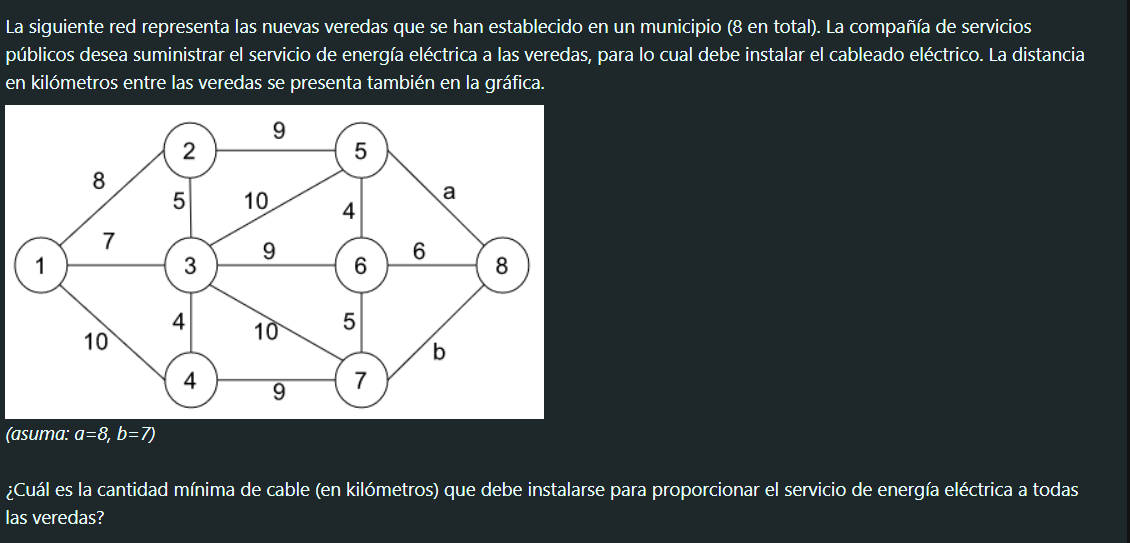

| De/Hacia| 1 | 2  | 3 | 4 | 5 | 6 | 7 | 8 |
| :-:     |:-:|:-: |:-:|:-:|:-:|:-:|:-:|:-:|
| 1 |       + | 8  | 7 | 10| + | + | + | + |
| 2 |       8 | +  | 5 | + | 9 | + | + | + |
| 3 |       7 | 5  | + | 4 | 10| 9 | 10| + |
| 4 |       10| +  | 4 | + | + | + | 9 | + |
| 5 |       + | 9  | 10| + | + | 4 | + | a |
| 6 |       + | +  | 9 | + | 4 | + | 5 | 6 |
| 7 |       + | +  | 10| 9 | + | 5 | + | b |
| 8 |       + | +  | + | + | a | 6 | b | + |

In [ ]:
import cvxpy as cvx
import numpy as np
import pandas as pd
# Variables de decisión
x = cvx.Variable((8,8), boolean = True)
a=8
b=7
# Función objetivo:
c = [
    [99999,8,7,10,99999,99999,99999,99999],
    [8,99999,5,99999,9,99999,99999,99999],
    [7,5,99999,4,10,9,10,99999],
    [10,99999,4,99999,99999,99999,9,99999],
    [99999,9,10,99999,99999,4,99999,a],
    [99999,99999,9,99999,4,99999,5,6],
    [99999,99999,10,9,99999,5,99999,b],
    [99999,99999,99999,99999,a,6,b,99999]
  ]

Z = cvx.Minimize(cvx.sum(cvx.multiply(c,x)))/2

# Restricciones
r = [
    # todos los nodos actuan como demanda porque no deben estar aislados
    cvx.sum(x[:,0]) >= 1,
    cvx.sum(x[:,1]) >= 1,
    cvx.sum(x[:,2]) >= 1,
    cvx.sum(x[:,3]) >= 1,
    cvx.sum(x[:,4]) >= 1,
    cvx.sum(x[:,5]) >= 1,
    cvx.sum(x[:,6]) >= 1,
    cvx.sum(x[:,7]) >= 1,

    # garantizar simetría de la matriz
    cvx.upper_tri(x) == cvx.upper_tri(x.T),

    # garantizar que no hay redes aisaldas
    cvx.sum(x) >= (8-1)*2
]

P = cvx.Problem(Z,r)
P.solve()
xd=pd.DataFrame(np.round(x.value,0))
a=[str(i) for i in range(1,len(c)+1)]
xd.index = a
xd.columns = a
print(P.status)
print(P.value)
print(xd)

optimal
38.0
     1    2    3    4    5    6    7    8
1  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
3  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0
4  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
6  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0
7  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0
8  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0


<h1>TIC</h1>
<img src="https://github.com/monicasofiarestrepo/InvestigacionDeOperaciones/blob/main/Proyectos/Imagenes/TIC.png?raw=1" width="900">

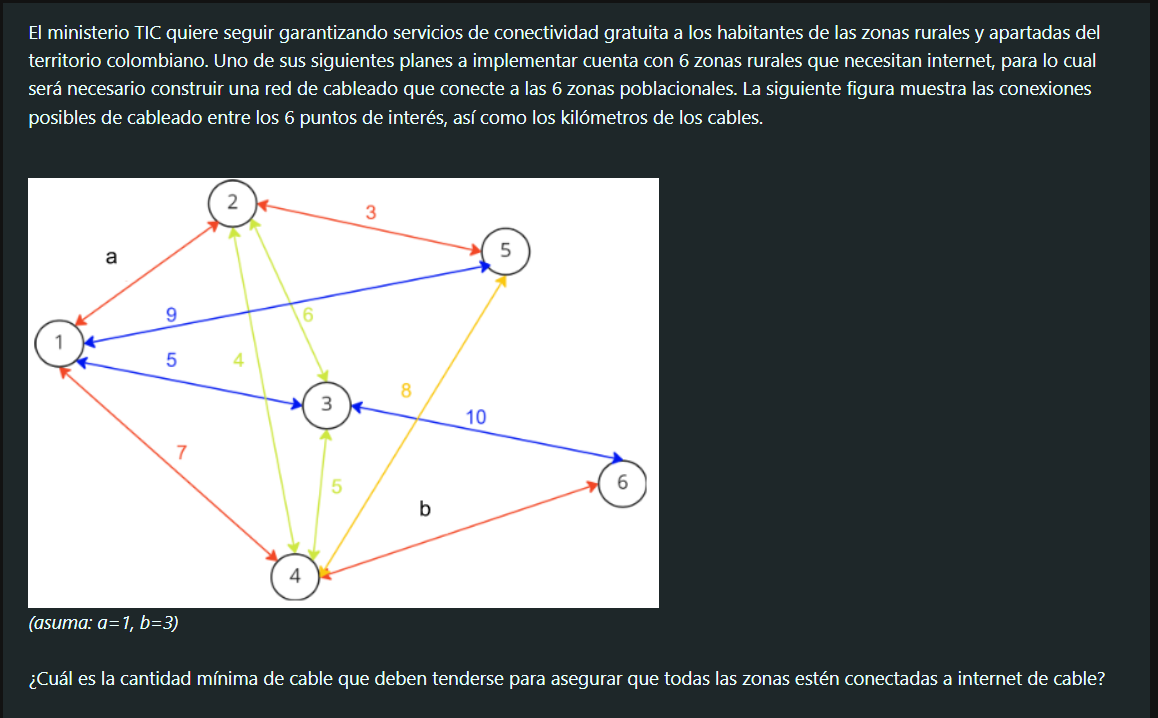

| De/Hacia| 1 | 2  | 3 | 4 | 5 | 6 |
| :-:     |:-:|:-: |:-:|:-:|:-:|:-:|
| 1 |       + | a  | 5 | 7 | 9 | + |
| 2 |       a | +  | 6 | 4 | 3 | + |
| 3 |       5 | 6  | + | 5 | + | 10|
| 4 |       7 | 4  | 5 | + | 8 | b |
| 5 |       9 | 3  | + | 8 | + | + |
| 6 |       + | +  | 10| b | + | + |

In [ ]:
import cvxpy as cvx
import numpy as np
import pandas as pd
# Variables de decisión
x = cvx.Variable((6,6), boolean = True)
a=1
b=3
# Función objetivo:
c = [
    [99999,a,5,7,9,99999],
    [a,99999,6,4,3,99999],
    [5,6,99999,5,99999,10],
    [7,4,5,99999,8,b],
    [9,3,99999,8,99999,99999],
    [99999,99999,10,b,99999,99999]
  ]

Z = cvx.Minimize(cvx.sum(cvx.multiply(c,x)))/2

# Restricciones
r = [
    # todos los nodos actuan como demanda porque no deben estar aislados
    cvx.sum(x[:,0]) >= 1,
    cvx.sum(x[:,1]) >= 1,
    cvx.sum(x[:,2]) >= 1,
    cvx.sum(x[:,3]) >= 1,
    cvx.sum(x[:,4]) >= 1,
    cvx.sum(x[:,5]) >= 1,


    # garantizar simetría de la matriz
    cvx.upper_tri(x) == cvx.upper_tri(x.T),

    # garantizar que no hay redes aisaldas
    cvx.sum(x) >= (6-1)*2
]

P = cvx.Problem(Z,r)
P.solve()
xd=pd.DataFrame(np.round(x.value,0))
a=[str(i) for i in range(1,len(c)+1)]
xd.index = a
xd.columns = a
print(P.status)
print(P.value)
print(xd)

optimal
16.0
     1    2    3    4    5    6
1  0.0  1.0  1.0  0.0  0.0  0.0
2  1.0  0.0  0.0  1.0  1.0  0.0
3  1.0  0.0  0.0  0.0  0.0  0.0
4  0.0  1.0  0.0  0.0  0.0  1.0
5  0.0  1.0  0.0  0.0  0.0  0.0
6  0.0  0.0  0.0  1.0  0.0  0.0
